**Tema: Análisis de una Campaña de Marketing Digital.**

**Autor: Francisco Moyano Escalera.**

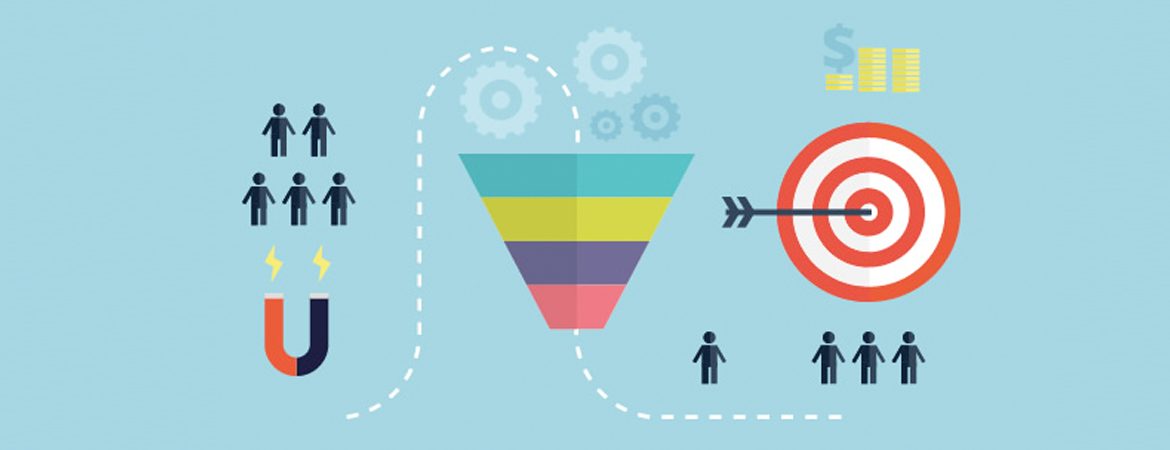

**1) Definición del Problema**

Se cuenta con una base de datos de anuncios a través de diversos canales, tanto internos como externos (facebook, instagram, etc) correspondientes a una campaña de marketing digital la cual tiene por fin que las personas que visualizan los anuncios se suscriban a un servicio.


**2) Objetivos**

Determinar si la campaña de marketing fue exitosa o no.

**3) Fuente de Datos**

Se trata de un archivo csv que incluye doce columnas con datos referidos a los anuncios de marketing (los cananales de marketing digital, los distintos idiomas de visualización de los anuncios, si la persona si suscribió y cuanto tiempo estuvo suscripta).
           
- user_id: número identificatorio único para cada usuario.
- date_served: fecha en que se visualizó el anuncio.       
- marketing_channel: canal de marketing a través del cual se visualizó el anuncio. 
- variant: variante del anuncio.           
- converted: si la persona que visuzalizó el anuncio se suscribió o no.           
- language_displayed: idioma en que apareció el anuncio.
- language_preferred: idioma preferido por la persona para visualizar el anuncio.
- age_group: grupo de edad al que perteneces las personas.     
- date_subscribed: fecha en que el usuario se suscribió.   
- date_canceled: fecha en que el usuario canceló la suscripción.     
- subscribing_channel: canal a través del cual se hizo suscripción.
- is_retained: si el usuario continúa con la suscripción o no.


           
            
               

**4) Solución Planteada**

Se llevará  a cabo un análisis exploratorio inicial de las variables y el cáculo de una serie de métricas claves (tasa de conversión y tasa de retensión), tanto de forma general como de forma específica, para determinar si la campaña fue exitosa o no.

**5) Adquisición de Datos**

In [ ]:
# Se realiza la conexión con Google Drive, en donde se encuentra almacenada la base de datos:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Se importan las librerías a utilizar:
# ============================================================================================================================================
# Configuración warnings:
import warnings
warnings.filterwarnings("ignore")
# ============================================================================================================================================
# Tratamiento, exploración y visualización de datos:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# Se carga la base de datos en un dataframe:
marketing = pd.read_csv('/content/drive/MyDrive/Proyectos/Marketing 2/marketing.csv')


In [ ]:
# Se imprime el encabezado del conjunto de datos:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [ ]:
# Se observa en detalle los nombres de las columnas y los tipos de datos:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


Se observa que existen columnas con datos faltantes. Se realizará un análisis mas detallado en la etapa de Data Wrangling.

In [ ]:
# Se crea un diccionario con la descripción de los campos de la base de datos:
marketing_desc = {"user_id":"número identificatorio único para cada usuario", "date_served":"fecha en que se visualizó el anuncio", 
                  "marketing_channel":"canal de marketing a través del cual se visualizó el anuncio. ", "variant":"variante del anuncio", 
                  "converted":"si la persona que visuzalizó el anuncio se suscribió o no", "language_displayed":"idioma en que apareció el anuncio", 
                  "language_preferred":"idioma preferido por la persona para visualizar el anuncio", "age_group":"grupo de edad al que pertenecen las personas", 
                  "date_subscribed":"fecha en que el usuario se suscribió", "date_canceled":"fecha en que el usuario canceló la suscripción", 
                  "subscribing_channel":"canal a través del cual se hizo suscripción", "is_retained":" si el usuario continúa con la suscripción o no"}

marketing_desc["user_id"]

'número identificatorio único para cada usuario'

**6) Limpieza y transformación de datos (Data Wrangling)**

In [ ]:
# Se determina si el dataframe tiene datos faltantes:
total = marketing.isnull().sum().sort_values(ascending = False)
percent = (marketing.isnull().sum() / marketing.isnull().count() * 100)
percent.sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ["Total Faltantes", "Porcentaje"])
missing_data

,Total Faltantes,Porcentaje
date_canceled,9460,94.251270
date_subscribed,8181,81.508419
subscribing_channel,8181,81.508419
is_retained,8181,81.508419
date_served,16,0.159410
marketing_channel,15,0.149447
converted,15,0.149447
user_id,0,0.000000
variant,0,0.000000
language_displayed,0,0.000000


Las columnas "date_canceled", "date_subscribed", "is_retained" y "subscribing_channel" cuentan con un alto porcentaje de datos nulos, sin embargo esto se debe a que no todas las personas que visualizaron los anuncios se suscribieron al servicio, y no todos los usuarios suscriptos cancelaron su suscripción.


In [ ]:
# Se transforma la columna "converted" en tipo de dato booleano:
marketing["converted"] = marketing["converted"].astype("bool")
marketing["converted"].dtype


dtype('bool')

In [ ]:
# Se convierte la columna "date_served" en una columna de tipo date:
marketing["date_served"] = pd.to_datetime(marketing["date_served"])
marketing["date_served"].dtype

dtype('<M8[ns]')

In [ ]:
# Se convierte la columna "date_subscribed" en una columna de tipo date:
marketing["date_subscribed"] = pd.to_datetime(marketing["date_subscribed"])
marketing["date_subscribed"].dtype

dtype('<M8[ns]')

In [ ]:
# Se crea una nueva columna booleana para establecer si los anuncios de marketing son internos o no:
marketing["is_house_ads"] = np.where(
    marketing["marketing_channel"] == "House Ads",
    True,False)

In [ ]:
# Se crea un diccionario en el que las claves son los canales de los anuncios y los valores los números asignados a los mismos:
channel_dict = {"House Ads":1, "Instagram":2,
                "facebook":3, "Email":4, "Push":5}

In [ ]:
# Se crea una nueva columna llamada "channel_code" utilizando el diccionario antes creado:
marketing["channel_code"]  = marketing["marketing_channel"].map(channel_dict)

In [ ]:
# Se observa el dataframe con las nuevas columnas creadas:
marketing.head(2)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ads,channel_code
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaN,House Ads,True,True,1.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaN,House Ads,True,True,1.0


**7) Análisis exploratorio**

In [ ]:
# Se analiza la distribución de la variable ""is_house_ads"":
marketing.groupby(["is_house_ads"]).size() / marketing.shape[0] * 100

is_house_ads
False    52.844475
True     47.155525
dtype: float64

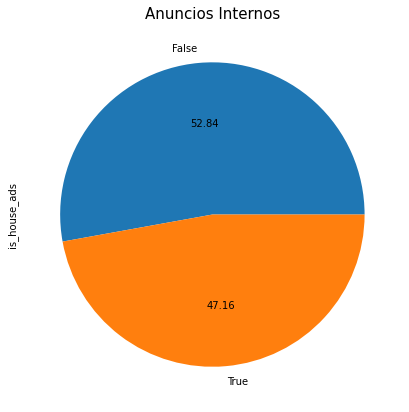

In [ ]:
# Se realiza un gráfico circular de los anuncios internos:
plot = marketing["is_house_ads"].value_counts().plot(kind="pie", autopct="%.2f", 
                                            figsize=(7, 7))
plt.title("Anuncios Internos", size=15)
plt.show()

El porcentaje de anuncios internos y externos es prácticamente el mismo, no hay grandes diferencias.

In [ ]:
# Se analiza en detalle la frecuencua para cada canal de "marketing_channel":
marketing.marketing_channel.value_counts()


House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

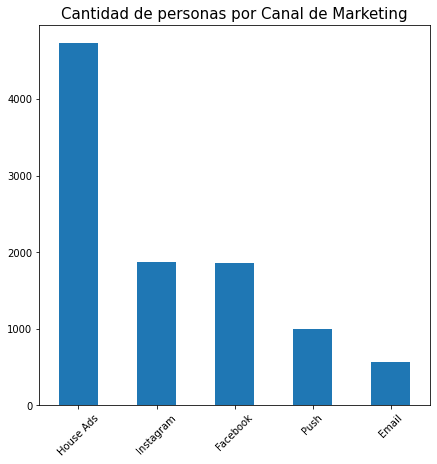

In [ ]:
# Se observa la distribución de la variable "marketing_channel" a través de un gráfico de barras:
plot = marketing["marketing_channel"].value_counts().plot(kind='bar', 
                                            figsize=(7, 7))
plt.title("Cantidad de personas por Canal de Marketing", size=15)
plt.xticks(rotation=45)
plt.show()

Respecto a los anuncios externos exclusicamente, los dos canales con la mayor cantidad de anuncios son Instagram y Facebook.

In [ ]:
# Se analiza en detalle la cantidad de usuarios únicos por grupo de edad (age_group):
age_group = marketing.groupby("age_group")["user_id"].nunique().sort_values()
age_group


age_group
55+ years       981
36-45 years    1058
45-55 years    1058
30-36 years    1059
0-18 years     1208
24-30 years    1220
19-24 years    1307
Name: user_id, dtype: int64

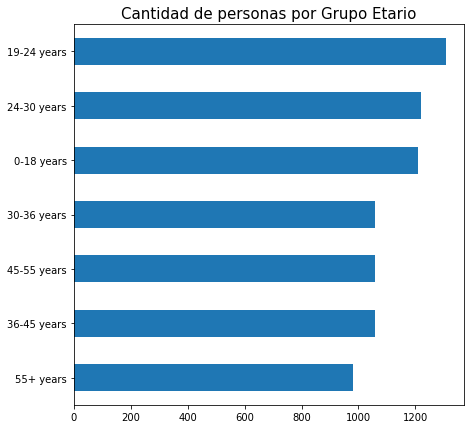

In [ ]:
# Se observa la distribución de la variable "age_group" a través de un gráfico de barras horizontales:
plot = age_group.plot(kind='barh',figsize=(7, 7))
plt.title("Cantidad de personas por Grupo Etario", size=15)
plt.xlabel("")
plt.ylabel("")
plt.show()

Del total de personas que vieron los anuncios, el 47% de ellos tienen entre 18 y 30 años de edad.

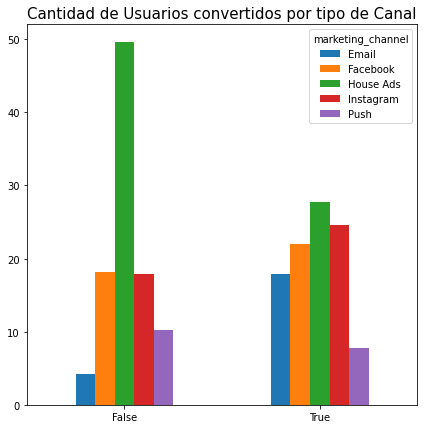

In [ ]:
# Se analiza la relación entre la columna "converted" y "marketing_channel"
plot = pd.crosstab(index=marketing["converted"],
           columns=marketing["marketing_channel"]).apply(lambda r: r/r.sum() *100,
                                             axis=1).plot(kind="bar", figsize=(7, 7))
plt.title("Cantidad de Usuarios convertidos por tipo de Canal", size=15)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=0)
plt.show()

Del gráfico se deduce que el canal con la mayor cantidad de personas que se suscribieron al servicio es el canal de Anuncios Internos, seguido de Instagram.

In [ ]:
# Se observa cuantas personas vieron por día los anuncios:
daily_users = marketing.groupby("date_served")["user_id"].nunique()
daily_users.head(5)

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64

In [ ]:
# Se calcula la media de personas por día que vieron los anuncios:
daily_users.mean()

314.2258064516129

En promedio 314 personas vieron los anuncios por día.

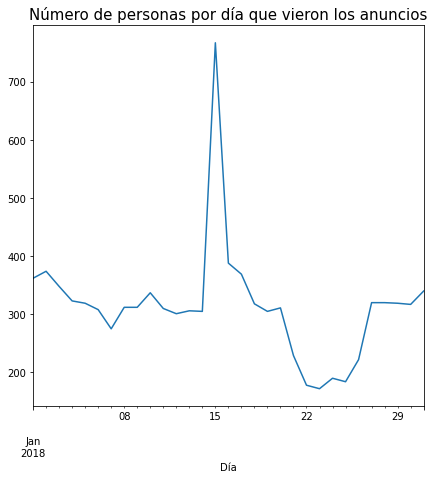

In [ ]:
# Se realiza un gráfico de línea de la cantidad de personas por día que vieron los anuncios:
daily_users.plot(figsize=(7, 7))
plt.title("Número de personas por día que vieron los anuncios", size= 15)
plt.xlabel("Día")
plt.xticks(rotation=0)
plt.show()


Mientras que la primera mitad del mes tiene alrededor de 300 personas por día, se produce un gran aumento a mediados del mes. Esto podría deberse, por ejemplo, al envío de un correo electrónico de marketing, que llegó a muchas personas que no son visitantes diarios.

In [ ]:
# Se determina la cantidad de personas por cada idioma preferido en cada fecha de visualización de los anuncios:
language = marketing.groupby(["date_served", "language_preferred"])["user_id"].count() # en este caso se pasa una lista con las dos columnas
language

date_served  language_preferred
2018-01-01   Arabic                  4
             English               355
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
                                  ... 
2018-01-30   Spanish                19
2018-01-31   Arabic                  8
             English               317
             German                  5
             Spanish                17
Name: user_id, Length: 121, dtype: int64

In [ ]:
# Para facilitar la manipulación de datos se crea un datarame y se utiliza el método .unstack para que cada idioma se convierta en una columna
# Se coloca el valor 1 en el argumento level dado que se quiere desapilar el segundo índice (el primer índice se representa con 0):
language = pd.DataFrame(language.unstack(level=1))
language.head()

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,355.0,5.0,11.0
2018-01-02,4.0,397.0,6.0,10.0
2018-01-03,3.0,374.0,3.0,8.0
2018-01-04,2.0,318.0,2.0,14.0
2018-01-05,1.0,314.0,2.0,14.0


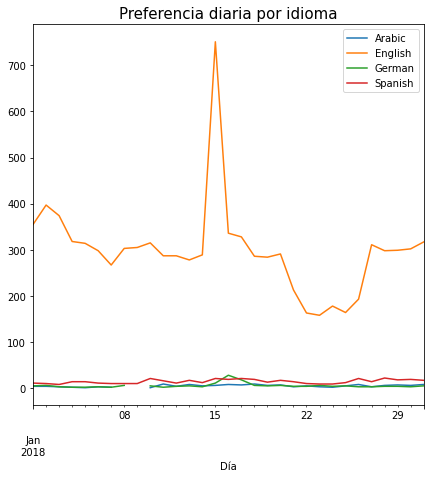

In [ ]:
# Se realiza un gráfico de líneas de la preferencia diaria por idioma:
language.plot(figsize=(7, 7))
plt.title("Preferencia diaria por idioma", size=15)
plt.xlabel("Día")
plt.legend(loc = "upper right", # determina la ubicación de la leyenda en el gráfico
           labels = language.columns.values) # se establecen los nombres de las columnas
plt.show()


Como se puede ver el idioma mas popular para visualizar los anuncios es el inglés, con una amplia diferencia respecto a los otros idiomas.

In [ ]:
# A continuación se determina la cantidad de personas por grupo de edad e idioma preferido:
language_age = marketing.groupby(["language_preferred", "age_group"])["user_id"].count()
language_age

language_preferred  age_group  
Arabic              0-18 years       19
                    19-24 years      26
                    24-30 years      19
                    30-36 years      19
                    36-45 years      19
                    45-55 years      21
                    55+ years        22
English             0-18 years     1421
                    19-24 years    1560
                    24-30 years    1442
                    30-36 years    1251
                    36-45 years    1260
                    45-55 years    1240
                    55+ years      1101
German              0-18 years       31
                    19-24 years      29
                    24-30 years      35
                    30-36 years      16
                    36-45 years      19
                    45-55 years      25
                    55+ years        12
Spanish             0-18 years       68
                    19-24 years      67
                    24-30 years      72
        

In [ ]:
# Se crea el dataframe para facilitar la visualización:
language_age = pd.DataFrame(language_age.unstack(level=1))
language_age.head()

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
language_preferred,,,,,,,
Arabic,19,26,19,19,19,21,22
English,1421,1560,1442,1251,1260,1240,1101
German,31,29,35,16,19,25,12
Spanish,68,67,72,69,55,67,52


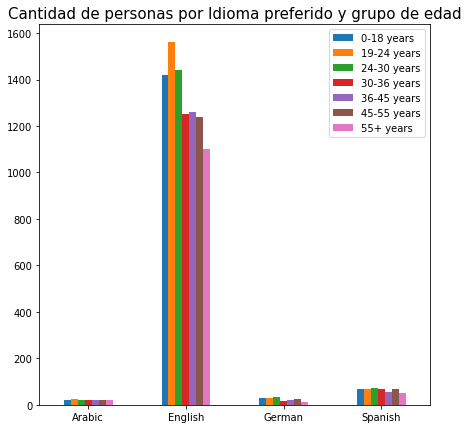

In [ ]:
# Se realiza un gráfico de barras múltiples:
language_age.plot(kind="bar", figsize=(7, 7))
plt.title("Cantidad de personas por Idioma preferido y grupo de edad", size=15)
plt.xticks(rotation=0)
plt.legend(loc = "upper right", 
           labels = language_age.columns.values)
plt.xlabel("")
plt.show()


Se corrobora que el idioma preferido para visualizar los anuncios es el ingés, siendo el grupo de personas de 19-24 los de mayor frecuencia.

**8) Cálculo de Métricas**

A continuación se calcularán una serie de métricas para poder determinar si la campaña fue existosa. Para un equipo de marketing el éxito de una campaña se mide generalmente por la **tasa de conversión**, es decir, de todas las personas que entraron en contacto con la campaña cuantas de ellas se suscribieron. Otra métrica importante, sobre todo en las empresas de servicios, es la **tasa retención**, mediante la cual se determina si una vez que un usuario se suscribió, si éste continúa con la suscripción en un periodo de tiempo determinado, por ejemplo tres meses.

* **Tasa de Conversión:** 

El cálculo de la Tasa de Conversión el el siguiente:

TC = Número total de personas que se suscribieron / Número total de personas a las que se dirijieron los anuncios




* Para calcular la Tasa de Conversión, primero se calcula el nº total de personas que se suscribieron, para esto se filtra el dataframe para dejar solo las filas donde convertido es igual a verdadero y luego se cuentan los id de usuarios únicos. A continuación se calcula el nº total de personas a las cuales se dirijieron los anuncios, para de este modo, obtener la tasa de conversión.

In [ ]:
# Cáculo de Tasa de Conversión:
suscribers = marketing[marketing["converted"] == True]["user_id"].nunique()
total = marketing["user_id"].nunique()
conv_rate = suscribers/total
print(round(conv_rate*100), "%")

14 %


El resultado de la Tasa de Conversión nos dice que de cada 100 personas que visualizaron los anuncios, 14 se suscribieron al servicio.

* **Tasa de Retención:**

La tasa de retención es el porcentaje de usuarios que permanecen subscriptos después de un cierto período de tiempo, en este caso nos centraremos en la retención de un mes. 

Fórmula de Tasa de Retención:

TR = Número total de usuarios que permanecen subscriptos / Número total de usuarios que se subscribieron

* Para calcular la Tasa de Retención, en primer lugar se determina el número total de usuarios que siguen estando suscriptos después de un mes. Esta información está disponible en la columna "is_retained". Luego se filtra el DataFrame para incluir solo las filas donde se retuvo al usuario, es decir, donde is_retained es igual a True y se cuentan los ID únicos. Se re-utiliza el cálculo de suscriptores realizado anteriormente, y finalmente se divide la cantidad de usuarios que fueron retenidos por la cantidad de usuarios que se suscribieron para calcular la tasa de retención.


In [ ]:
# Cálculo de Tasa de Retención:
retained = marketing[marketing["is_retained"] == True]["user_id"].nunique()
suscribers = marketing[marketing["converted"] == True]["user_id"].nunique()
retention_rate = retained/suscribers
print(round(retention_rate*100), "%")

66 %


El resultado de la Tasa de Retención nos dice que de cada 100 usuarios que se suscribieron al servicio 66 continuaron suscriptos luego de un mes.

* A continuación se realizará un desglose de las métricas antes calculadas por distintas características con el fin de sacar conclusiones mas específicas, por ejemplo: calcular la tasa de conversión por grupo de edad, canal de comunicación, etc. Esta segmentación es importante ya que es posible que una campaña haya tenido una tasa de conversión general baja, pero que haya sido muy efectiva para usuarios de un determinado grupo etario., entonces en lugar de calificar la campaña como un fracaso esto puede servir para realizar una campaña en la que los usuarios de este grupo etario reciban una estrategia de marketing diferente a la de los demás.

In [ ]:
# Se calcula la Tasa de Retención exclusivamente para los usuarios que se suscribieron por el canal "anuncios internos":
house_ads = marketing[marketing["subscribing_channel"] == "House Ads"]
retained = house_ads[house_ads["is_retained"] == True]["user_id"].nunique()
suscribers = house_ads[house_ads["converted"] == True]["user_id"].nunique()
retention_rate = retained/suscribers
print(round(retention_rate*100), "%")



58 %


En principio la Tasa de Retención para los anuncios internos parece aceptable, sin embargo para sacar una mejor conclusión es necesario compararla con los resultados de los otros canales.

In [ ]:
# Se calcula la cantidad de usuarios únicos que continúan suscriptos, agrupados por el tipo de canal de suscripción:
retained = marketing[marketing["is_retained"] == True].groupby(["subscribing_channel"])["user_id"].nunique()
retained

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64

In [ ]:
# Se calcula la cantidad de usuarios únicos total que se suscribieron, agrupados por el tipo de canal de suscripción:
suscribers = marketing[marketing["converted"] == True].groupby(["subscribing_channel"])["user_id"].nunique()
suscribers

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64

In [ ]:
# Se calcula la Tasa de Retención específica para cada canal:
channel_retention_rate = (retained/suscribers)*100
channel_retention_rate

subscribing_channel
Email        87.577640
Facebook     68.778281
House Ads    58.053691
Instagram    68.103448
Push         70.129870
Name: user_id, dtype: float64

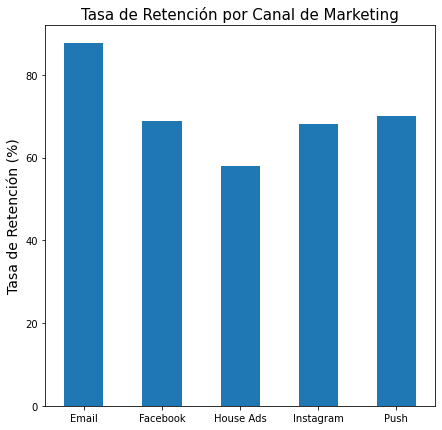

In [ ]:
# Se crea un gráfico de barras para visualizar las Tasas de Retención por canal de marketing:
channel_retention_rate.plot(kind="bar", figsize=(7,7))
plt.title("Tasa de Retención por Canal de Marketing", size=15)
plt.ylabel("Tasa de Retención (%)", size=14)
plt.xlabel("")
plt.xticks(rotation=0)
plt.show()

De este modo se llega a la conclusión de que el correo electrónico es el canal de marketing con  la tasa de retención más alta, mientras que los anuncios internos ocupan el último lugar en esta comparación.

* A continuación se calculará la Tasa de Conversión por el tipo de idioma de visualización del anuncio.

In [ ]:
# Se agrupan los usuarios únicos por cada tipo de idioma:
total = marketing.groupby(["language_displayed"])\
                                  ["user_id"].nunique()

# Se determina el total de usuarios únicos que se suscribieron por cada tipo de idioma:
subscribers = marketing[marketing["converted"] == True]\
                       .groupby(["language_displayed"])\
                       ["user_id"].nunique()

# Se calcula la Tasa de Conversión para cada uno de los idiomas:
language_conversion_rate = (subscribers/total) * 100
print(language_conversion_rate)

language_displayed
Arabic     50.000000
English    13.125959
German     71.621622
Spanish    20.000000
Name: user_id, dtype: float64


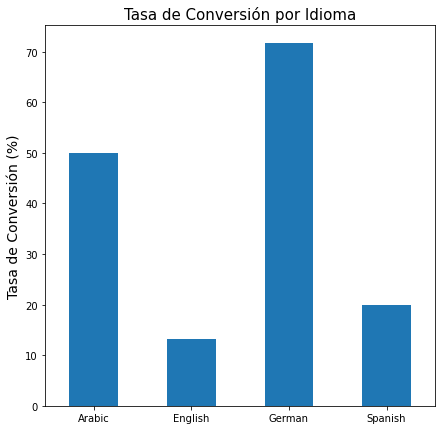

In [ ]:
# Se crea un gráfico de barras para visualizar las Tasas de Conversión por idioma:
language_conversion_rate.plot(kind="bar", figsize=(7,7))
plt.title("Tasa de Conversión por Idioma", size=15)
plt.xlabel("")
plt.ylabel("Tasa de Conversión (%)", size=14)
plt.xticks(rotation=0)
plt.show()

La Tasa de Conversión es mucho más baja para los idiomas inglés y español, mientras que los idiomas alemán y árabe cuentan con las tasas mas altas.

* Se llevarán a cabo una serie de funciones para facilitar y agilizar los futuros análisis.

In [ ]:
# Se crea una función de Tasa de Conversión en la cual se pasan un dataframe y una lista de nombres de columnas:
def conversion_rate(dataframe, column_names):
    # Se agrupa por column_names y se calcula la conversión:
    column_conv = dataframe[dataframe["converted"] == True]\
                       .groupby(column_names)["user_id"].nunique()

    # Se calcula el total de personas:
    column_total = dataframe.groupby(column_names)["user_id"].nunique()   
    
    # Se calcula la Tasa de Conversión:
    conversion_rate = column_conv/column_total
    
    # Se convierten los valores nulos en 0:
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

* Utilizando la función antes creada, se determinará la Tasa de Conversión por fecha en que se observó el anuncio y por grupo etario, pasando estas columnas como una lista de string.

In [ ]:
# Se calcula la Tasa de Conversión diaria por grupo etario:
age_group_conv = conversion_rate(marketing, ['date_served',
                                             'age_group'])
age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))
age_group_df.head()


age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
date_served,,,,,,,
2018-01-01,0.155172,0.196721,0.105263,0.040816,0.042553,0.022222,0.086957
2018-01-02,0.180328,0.164384,0.114754,0.040000,0.043478,0.043478,0.024390
2018-01-03,0.102041,0.208955,0.150943,0.042553,0.060000,0.047619,0.043478
2018-01-04,0.117647,0.200000,0.183673,0.045455,0.043478,0.061224,0.073171
2018-01-05,0.142857,0.250000,0.136364,0.090909,0.068182,0.046512,0.088889


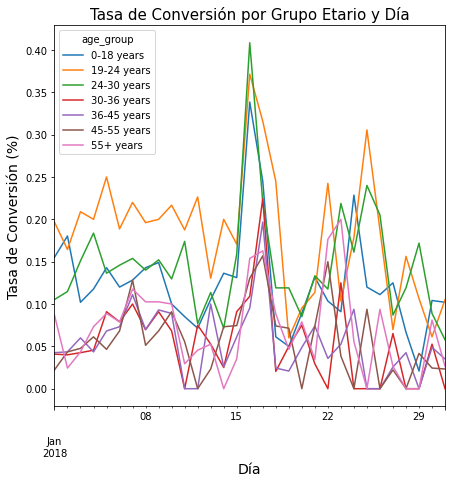

In [ ]:
# Se realiza el gráfico de la Tasa de Conversión:
age_group_df.plot(figsize=(7,7))
plt.title("Tasa de Conversión por Grupo Etario y Día", size = 15)
plt.ylabel("Tasa de Conversión (%)", size = 14)
plt.xlabel("Día", size = 14)
plt.xticks(rotation=0)
plt.show()

Debido a que este gráfico es un poco difícil de entender, se realizará un gráfico individual para cada canal de marketing para identificar mejor las tendencias, creando a su vez una función para el gráfico.

In [ ]:
# Se establece la función del gráfico que toma como argumento un dataframe:
def plotting_conv(dataframe):
    for column in dataframe:
        
        plt.plot(dataframe.index, dataframe[column])
        plt.title("Tasa de Conversión  " + str(column),
                  size = 15)
        plt.ylabel("Tasa de Conversión (%)", size = 14)
        plt.xticks(rotation=45)      
        plt.show()
        plt.clf()

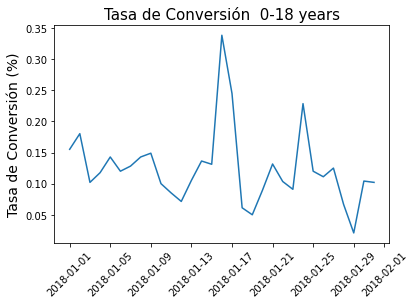

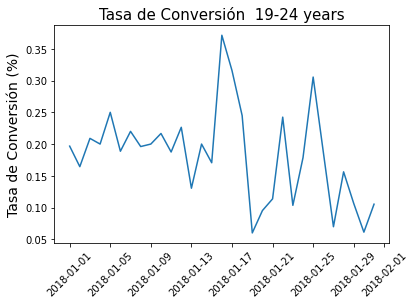

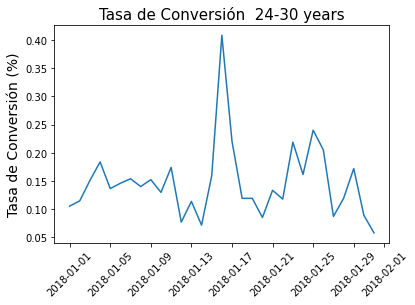

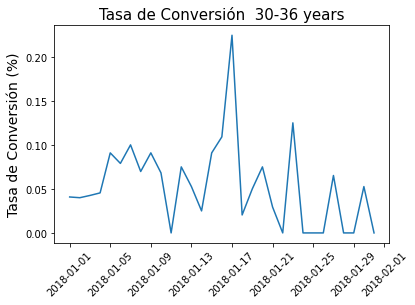

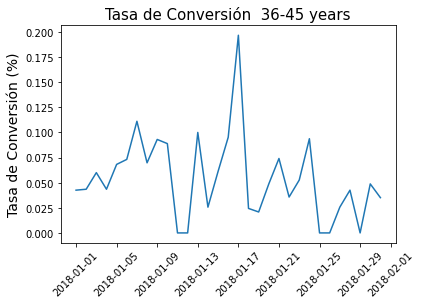

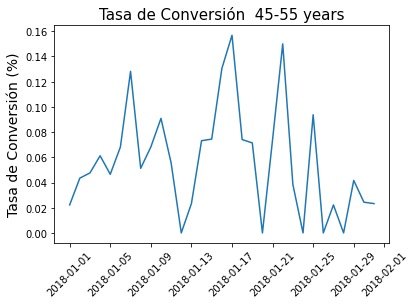

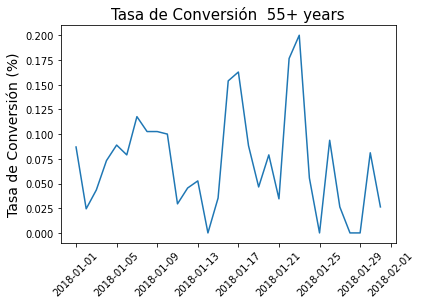

<Figure size 432x288 with 0 Axes>

In [ ]:
# Se realiza el gráfico:
plotting_conv(age_group_df)

De este modo se puede visualizar la Tasa de Conversión por grupo etario de manera mas detallada.

In [ ]:
# Se crea una función de Tasa de Retención en la cual se ingresa un dataframe y una lista de nombres de columnas:
def retention_rate(dataframe, column_names):
    # Se agrupa por column_names y se calcula la retención:
    retained = dataframe[dataframe["is_retained"] == True]\
                       .groupby(column_names)["user_id"].nunique()

    # Se agrupa por column_names y se calcula la conversión:
    converted = dataframe[dataframe["converted"] == True]\
                       .groupby(column_names)["user_id"].nunique() 
    
    # Se calcula la Tasa de Retención:
    retention_rate = retained/converted 
    return retention_rate

* A continuación se calcula, utilizando la función antes creada, la Tasa de Retención por canal de marketing y fecha de suscripción, pasando estas columnas como una lista de string. 

In [ ]:
# Se calcula la Tasa de Retención diaria por tipo de canal:
daily_retention = retention_rate(marketing, ["date_subscribed", "subscribing_channel"])
daily_retention = pd.DataFrame(daily_retention.unstack(level=1))
daily_retention.head()


subscribing_channel,Email,Facebook,House Ads,Instagram,Push
date_subscribed,,,,,
2018-01-01,1.00,0.875000,0.687500,0.750000,1.000000
2018-01-02,0.75,1.000000,0.588235,0.625000,1.000000
2018-01-03,NaN,0.800000,0.647059,0.909091,0.666667
2018-01-04,1.00,0.666667,0.466667,0.500000,NaN
2018-01-05,1.00,0.571429,0.500000,0.636364,1.000000


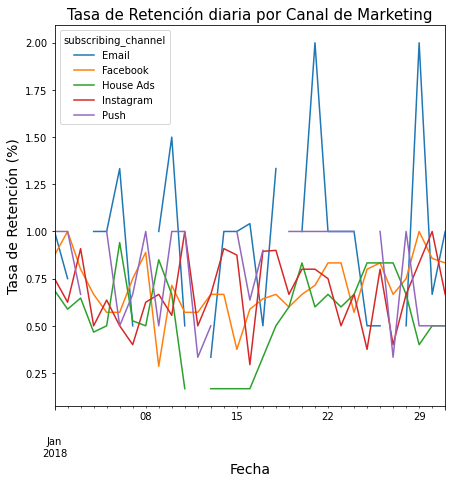

In [ ]:
# Se realiza un gráfico de líneas de la Tasa de Retención antes calculada:
daily_retention.plot(figsize=(7,7))
plt.title("Tasa de Retención diaria por Canal de Marketing", size = 15)
plt.ylabel("Tasa de Retención (%)", size = 14)
plt.xlabel("Fecha", size = 14)
plt.show()

Al igual que con la Tasa de Conversión por grupo etario, se dificulta ver el gráfico de Tasa de Retención por lo que se hará un gráfico individual para cada canal de marketing a través de una función de gráfico.

In [ ]:
# Se establece la función del gráfico que toma como argumento un dataframe:
# A través de un bucle for se recorre cada columna del dataframe y se grafica cada una individualmente:
def plotting(dataframe):
    for column in dataframe:
        # En el eje x se coloca el índice de cada columna para mostras las fechas, mientras que los valores de las columnas van en el eje y:
        plt.plot(dataframe.index, dataframe[column])
        plt.title("Tasa de Retención  " + str(column),
                  size = 15)
        plt.ylabel("Tasa de Retención (%)", size = 14)
        plt.xticks(rotation=45)      
        plt.show()
       


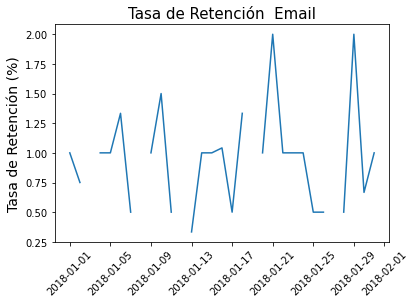

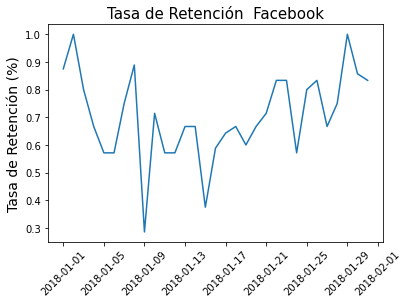

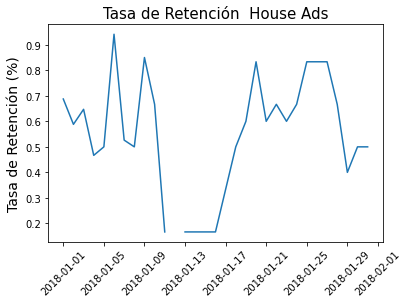

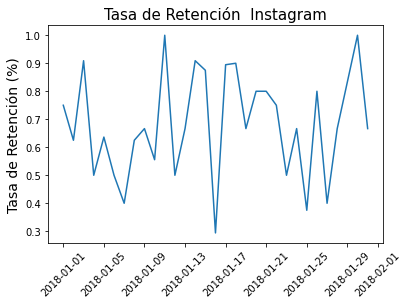

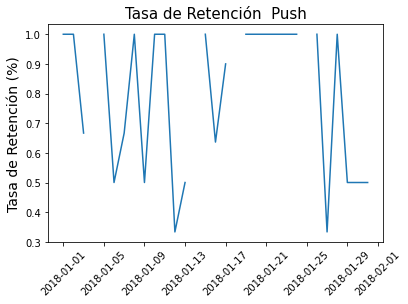

In [ ]:
# Se realiza el gráfico:
plotting(daily_retention)

Se observa un gráfico para cada canal de marketing (columna del dataframe creado) por fecha. El gráfico del correo electrónico tiene grandes picos que a menudo bajan a 0. Esto es común porque los correos electrónicos generalmente se envían en masa, lo que lleva a los usuarios a suscribirse en el mismo conjunto de días limitados. Cuando la tasa de retención es 0, esto significa que nadie se suscribió en esos días.

* Ahora se tratará de encontrar la causa de la disminución repentina de la tasa de conversión observada en los anuncios internos.

In [ ]:
# Se calcula la Tasa de Conversión por fecha y canal:
daily_conv_channel = conversion_rate(marketing, ["date_served", 
                                                 "marketing_channel"])

# Se convierte daily_conv_channel en un dataframe:
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))
daily_conv_channel.head(12)


marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,1.000000,0.117647,0.084656,0.106667,0.083333
2018-01-02,1.000000,0.098361,0.077982,0.129032,0.055556
2018-01-03,0.000000,0.080645,0.088542,0.171875,0.083333
2018-01-04,0.500000,0.138462,0.089820,0.126984,0.058824
2018-01-05,1.000000,0.112903,0.126582,0.159420,0.027778
2018-01-06,0.600000,0.111111,0.111842,0.095238,0.068966
2018-01-07,1.000000,0.096154,0.145038,0.175439,0.088235
2018-01-08,1.000000,0.136364,0.103896,0.125000,0.064516
2018-01-09,0.500000,0.120690,0.127389,0.152542,0.054054


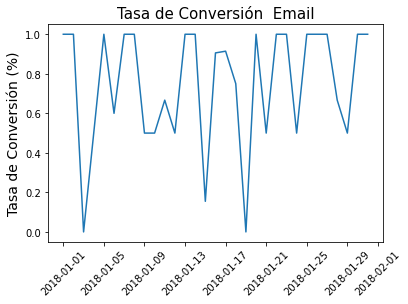

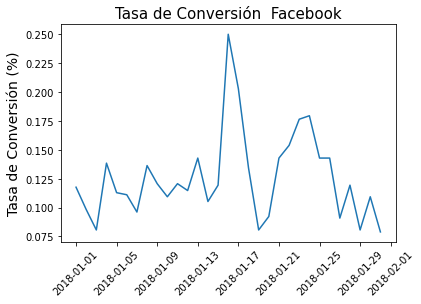

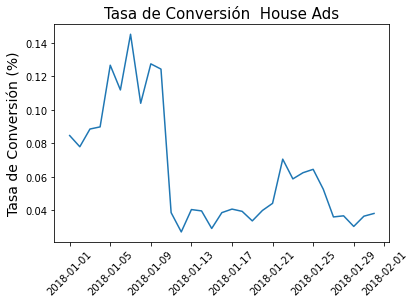

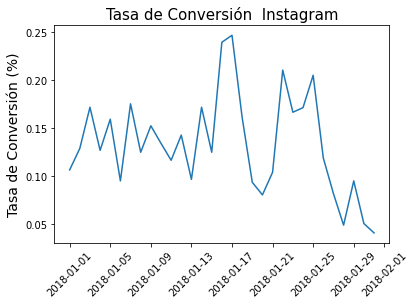

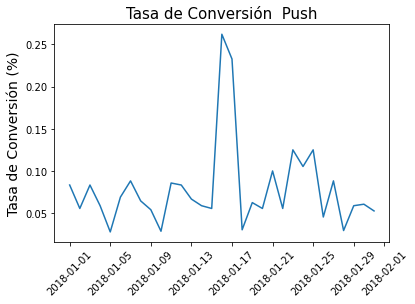

<Figure size 432x288 with 0 Axes>

In [ ]:
# Se grafican los resultados de daily_conv_channel:
plotting_conv(daily_conv_channel)


Se observa que la tasa de conversión de los anuncios internos tiene una disminución repentina a partir del 11 de enero. Se analizarán las causas de la disminución (por ejemplo cambios en el comportamiento del usuario según el día de la semana o un problema en la implementación de la estrategia de marketing).
En primer lugar se analizará si es mas probable que los usuarios realicen conversiones los fines de semana en comparación con otros día de la semana.

In [ ]:
# Se crea una columna con el día de la semana en que se vio el anuncio:
marketing["DoW_served"] = marketing["date_served"].dt.dayofweek

# Se calcula la Tasa de Conversión por día de semana y canal de marketing:
DoW_conversion = conversion_rate(marketing, ["DoW_served", 
                                             "marketing_channel"])
# Se crea un dataframe
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))
DoW_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
DoW_served,,,,,
0.0,0.162621,0.119601,0.062660,0.122517,0.064516
1.0,0.906250,0.147887,0.070312,0.151943,0.115854
2.0,0.837209,0.127036,0.075269,0.150160,0.105882
3.0,0.727273,0.133333,0.059034,0.143498,0.067797
4.0,0.666667,0.110132,0.062278,0.129870,0.055556
5.0,0.818182,0.109375,0.057566,0.088710,0.069767
6.0,0.750000,0.116071,0.065217,0.127193,0.065574


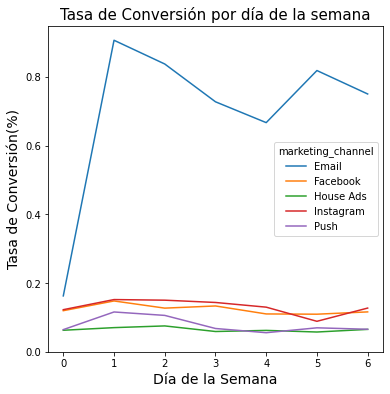

In [ ]:
# Se grafica la Tasa de Conversión por día de la semana:
DoW_df.plot(figsize=(6,6))
plt.title("Tasa de Conversión por día de la semana", size=15)
plt.xlabel("Día de la Semana", size = 14)
plt.ylim(0)
plt.ylabel("Tasa de Conversión(%)", size = 14)
plt.show()

Del gráfico anterior se deduce que la tasa de conversión del canal correo electrónico es particularmente alta y refleja una variación por día de semana, mientras que los anuncios internos parecen estables durante la semana (tan solo presenta un ligero pico el día martes). Se continúa con el análisis.

* Se analizará la conversión del canal anuncios internos por idioma: ahora que se han descartado las fluctuaciones que se pueden dar naturalmente a lo largo de la semana en que el usuario vio los anuncios de marketing, se analizará la conversión por idioma a lo largo del tiempo (puede ocurrir que la campaña de marketing no sea efectiva en todos los idiomas en los que aparecen los anuncios)

In [ ]:
# Primero se filtran las filas donde el canal de marketing es anuncios internos:
house_ads = marketing[marketing["marketing_channel"] == "House Ads"]

# Se calcula la tasa de conversión por fecha en que se vió el anuncio e idioma en que se visualizó:
conv_lang_channel = conversion_rate(house_ads, 
                                    ["date_served", 
                                     "language_displayed"])

# Se crea el dataframe:
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))
conv_lang_df.head(12)


language_displayed,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,1.0,0.075145,0.200000,0.000000
2018-01-02,0.0,0.068966,0.600000,0.000000
2018-01-03,0.0,0.083799,0.333333,0.125000
2018-01-04,0.0,0.080537,0.000000,0.214286
2018-01-05,NaN,0.118881,0.000000,0.214286
2018-01-06,1.0,0.087591,0.000000,0.200000
2018-01-07,1.0,0.117647,1.000000,0.125000
2018-01-08,NaN,0.079710,0.500000,0.200000
2018-01-09,NaN,0.129252,NaN,0.100000


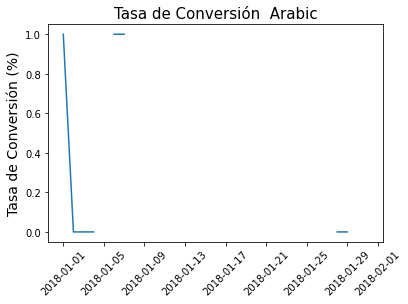

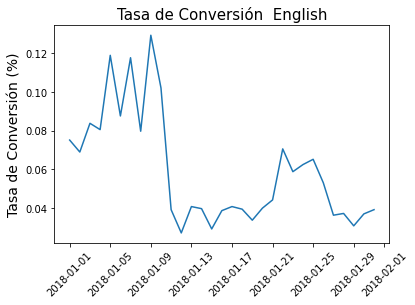

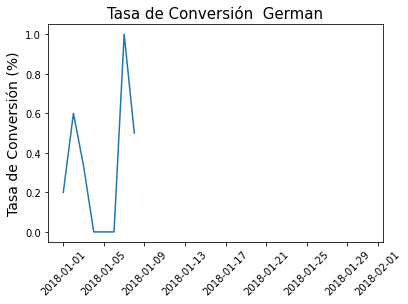

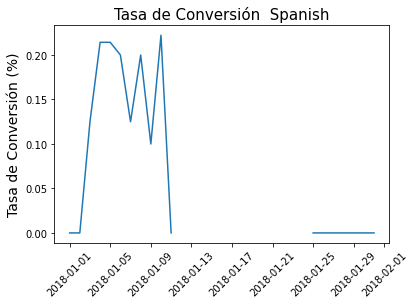

<Figure size 432x288 with 0 Axes>

In [ ]:
# Se realiza el gráfico de la tasa de conversión:
plotting_conv(conv_lang_df)

Se puede observar que la tasa de conversión en el idioma inglés cae a partir del día 11 y no parece que se publiquen anuncios en otros idiomas durante un periodo de dos semanas, por lo que se intuye que el problema puede estar en el idioma de visualización. Se continúa investigando.

In [ ]:
# Se crea una columna llamada "es el idioma correcto":
house_ads["is_correct_lang"] = np.where(
    house_ads["language_preferred"] == house_ads["language_displayed"], 
    "Yes", 
    "No")

# Se agrupa poe fecha y por la columna "is_correct_lang":
language_check = house_ads.groupby(["date_served","is_correct_lang"])["is_correct_lang"].count()

# Se crea un dataframe:
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)
language_check_df.head(12)

is_correct_lang,No,Yes
date_served,,
2018-01-01,2.0,189.0
2018-01-02,3.0,247.0
2018-01-03,0.0,220.0
2018-01-04,0.0,168.0
2018-01-05,0.0,160.0
2018-01-06,1.0,151.0
2018-01-07,2.0,130.0
2018-01-08,0.0,154.0
2018-01-09,0.0,157.0


In [ ]:
# Se crea una columna en la que se calcula que porcentaje de usuarios no recibieron el anuncio en el idioma correcto:
language_check_df["pct"] = language_check_df["No"]/language_check_df.sum(axis=1)
language_check_df.head(12)

is_correct_lang,No,Yes,pct
date_served,,,
2018-01-01,2.0,189.0,0.010471
2018-01-02,3.0,247.0,0.012000
2018-01-03,0.0,220.0,0.000000
2018-01-04,0.0,168.0,0.000000
2018-01-05,0.0,160.0,0.000000
2018-01-06,1.0,151.0,0.006579
2018-01-07,2.0,130.0,0.015152
2018-01-08,0.0,154.0,0.000000
2018-01-09,0.0,157.0,0.000000


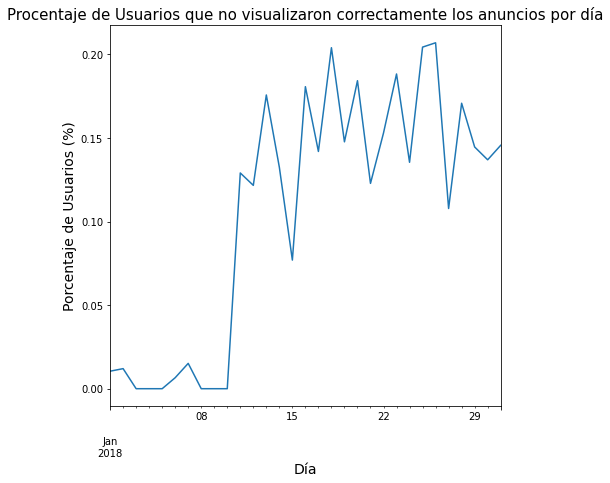

In [ ]:
language_check_df["pct"].plot(figsize=(7,7))
plt.title("Procentaje de Usuarios que no visualizaron correctamente los anuncios por día", size = 15)
plt.ylabel("Porcentaje de Usuarios (%)", size = 14)
plt.xlabel("Día", size = 14)
plt.show()

En base al análisis realizado se concluye en que la caída en la tasa de conversión de los anuncios internos a partir del día 11 de enero se debe a que los mismos fueron visualizados solo en inglés en lugar del idioma preferido de cada usuario.

* Ahora se evaluará que impacto tuvo la caída en la tasa de conversión debido al problema en la visualización de los anuncios, estimando cual hubiera sido la tasa de conversión si no hubiera existido el problema. 
 
 Una forma de evaluar el impacto es indexar las tasas de conversión de todos los demás idiomas al inglés durante el período en que los anuncios se publicaron en el idioma correcto para cada usuario.

 Se comienza cortando el marco de datos house_ads para incluir las filas donde la fecha de servicio es anterior a cuando surgió el error de idioma. Usando la función conversion_rate(), se calcula la tasa de conversión para cada idioma durante ese período:

In [ ]:
# Se calcula la tasa de conversión previo a la fecha cuando comenzó el error:
house_ads_no_bug = house_ads[house_ads["date_served"] < "2018-01-11"]
lang_conv = conversion_rate(house_ads_no_bug, ["language_displayed"])
lang_conv 

language_displayed
Arabic     0.500000
English    0.099093
German     0.444444
Spanish    0.166667
Name: user_id, dtype: float64

* Se divide la tasa de conversión de todos los demas idiomas por la tasa de conversión del inglés para comprender la relación relativa de que tan bien los anuncios internos suelen convertir a los usuarios de cada idioma en comparación al inglés:

In [ ]:
# Se indexa la tasa de conversión de otros idiomas contra el inglés:
spanish_index = lang_conv["Spanish"]/lang_conv["English"]
arabic_index = lang_conv["Arabic"]/lang_conv["English"]
german_index = lang_conv['German']/lang_conv["English"]
print("Indice Español:", spanish_index)
print("Indice Arabe:", arabic_index)
print("Indice Aleman:", german_index)

Indice Español: 1.681924882629108
Indice Arabe: 5.045774647887324
Indice Aleman: 4.485133020344287


* De acuerdo a los resultados de los índices se observa que los usuarios de habla hispana suelen convertir 1,7 veces más que los angloparlantes, mientras que los hablantes alemanes y árabes convierten entre 4 y 5 veces más.
 
 A continuación se calcula el número total de usuarios por día en base al idioma preferido y las conversiones reales de cada día:

In [ ]:
# Se agrupa house_ads por fecha e idioma preferido:
# Se usa el método .agg() ya que se quieren calcular dos valores.
# Se pasa un diccionario al método donde la clave es el nombre de la columna y el valor es la operación que se quiere calcular:
language_conversion = house_ads.groupby(["date_served", 
                          "language_preferred"])\
                        .agg({"user_id":"nunique",
                              "converted":"sum"})

# Se crea el dataframe:
converted_df = pd.DataFrame(language_conversion.unstack(level=1))
converted_df.head(12)

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0       2.0    13.0    1.0   
2018-01-02             3.0   200.0    5.0    10.0       0.0    14.0    3.0   
2018-01-03             2.0   179.0    3.0     8.0       0.0    15.0    1.0   
2018-01-04             2.0   149.0    2.0    14.0       0.0    12.0    0.0   
2018-01-05             NaN   143.0    1.0    14.0       NaN    17.0    0.0   
2018-01-06             3.0   136.0    2.0    11.0       3.0    12.0    0.0   
2018-01-07             2.0   117.0    2.0    10.0       2.0    14.0    2.0   
2018-01-08             NaN   138.0    6.0    10.0       NaN    11.0    3.0   
2018-01-09             NaN   147.0    NaN    10.0       NaN    19.0    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN    15.0    2.0   
2018-01-11             7.0   133.0    2.0    13.0       0.0     6.0    0.0   
2018-01-12             3.0   129.0    4.0    11.0       0.0     3.0    0.0   

                            
language_preferred Spanish  
date_served                 
2018-01-01             0.0  
2018-01-02             0.0  
2018-01-03             1.0  
2018-01-04             3.0  
2018-01-05             3.0  
2018-01-06             2.0  
2018-01-07             1.0  
2018-01-08             2.0  
2018-01-09             1.0  
2018-01-10             4.0  
2018-01-11             0.0  
2018-01-12             1.0

El resultado es un dataframe con la cantidad de usaurios que deberían haber visto anuncios en cada idioma y cuantos de esos usuarios se convirtieron cada día.

* Se calcula la tasa de conversión del idioma inglés para el periodo de error:

In [ ]:
# Se calcula la tasa de conversión en el idioma inglés para el periodo de error:
converted_df["actual_english_conversions"] = converted_df.loc["2018-01-11":"2018-01-31"][("converted","English")]
converted_df.head(12)


user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0       2.0    13.0    1.0   
2018-01-02             3.0   200.0    5.0    10.0       0.0    14.0    3.0   
2018-01-03             2.0   179.0    3.0     8.0       0.0    15.0    1.0   
2018-01-04             2.0   149.0    2.0    14.0       0.0    12.0    0.0   
2018-01-05             NaN   143.0    1.0    14.0       NaN    17.0    0.0   
2018-01-06             3.0   136.0    2.0    11.0       3.0    12.0    0.0   
2018-01-07             2.0   117.0    2.0    10.0       2.0    14.0    2.0   
2018-01-08             NaN   138.0    6.0    10.0       NaN    11.0    3.0   
2018-01-09             NaN   147.0    NaN    10.0       NaN    19.0    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN    15.0    2.0   
2018-01-11             7.0   133.0    2.0    13.0       0.0     6.0    0.0   
2018-01-12             3.0   129.0    4.0    11.0       0.0     3.0    0.0   

                           actual_english_conversions  
language_preferred Spanish                             
date_served                                            
2018-01-01             0.0                        NaN  
2018-01-02             0.0                        NaN  
2018-01-03             1.0                        NaN  
2018-01-04             3.0                        NaN  
2018-01-05             3.0                        NaN  
2018-01-06             2.0                        NaN  
2018-01-07             1.0                        NaN  
2018-01-08             2.0                        NaN  
2018-01-09             1.0                        NaN  
2018-01-10             4.0                        NaN  
2018-01-11             0.0                        6.0  
2018-01-12             1.0                        3.0

* Luego se multiplica la tasa de conversión de inglés real durante el periodo por los índices de idiomas que se crearon anteriormente, para determinar cuales habrían sido las tasas de conversión esperadas para estos idiomas para cada día:

In [ ]:
# Se calculan las tasas de conversión esperadas para cada idioma:
converted_df["expected_spanish_rate"] = converted_df["actual_english_conversions"]*spanish_index
converted_df["expected_arabic_rate"] = converted_df["actual_english_conversions"]*arabic_index
converted_df["expected_german_rate"] = converted_df["actual_english_conversions"]*german_index



* Ahora se  multiplica la tasa de conversión diaria esperada de cada idioma por la cantidad de usuarios que deberían haber visto anuncios en ese idioma. Esto  da como resultado cuántos suscriptores se habrían esperado si no hubiera ocurrido el error de idioma:

In [ ]:
# Se multiplica el número de usuarios por la tasa de conversión esperada
converted_df["expected_spanish_conv"] = converted_df["expected_spanish_rate"]/100*converted_df[("user_id","Spanish")]
converted_df["expected_arabic_conv"] = converted_df["expected_arabic_rate"]/100*converted_df[("user_id","Arabic")]
converted_df["expected_german_conv"] = converted_df["expected_german_rate"]/100*converted_df[("user_id","German")]

* Por último se determina el número de suscriptores perdidos en el periodo de error. Para esto se toma la diferencia en la cantidad de suscriptores que se esperaban y la cantidad de suscriptores que se recibieron, lo que da una estimación de cuántos suscriptores se perdieron debido al error de idioma.

In [ ]:
# En primer lugar se limita el dataframe al periodo de análisis
converted = converted_df["2018-01-11":"2018-01-31"]
# Luego se suman el nº de suscriptores esperados y los reales en el periodo:
expected_subs = converted["expected_spanish_rate"].sum() + converted["expected_arabic_rate"].sum() + converted["expected_german_rate"].sum()
# Se calcula cuantos suscriptores hay realmente:
actual_subs = converted[("converted","Spanish")].sum() + converted[("converted","Arabic")].sum() + converted[("converted","German")].sum()
# Finalmente se calcula la diferencia entre los  suscriptores que se esperaban y los suscriptores que se recibieron, lo que da cuantos suscriptores se perdieron
lost_subs = expected_subs - actual_subs
lost_subs

1028.0062597809078

La cantidad de usuarios que se perdieron en el periodo de análisis fue 1028.

**9) Conclusión** 


Tomando como referencia los valores de la Tasa de Conversión (14%) y de la Tasa de Retención (66%) generales, se puede afirmar que la campaña de marketing digital fue exitosa. Si bien el valor de la Tasa de Conversión no pareciera ser muy alto, es importante destacar que a nivel general los valores positivos suelen estar en un rango del 10% al 20%. A su vez en el análisis realizado se observó una caída en la Tasa de Conversión a partir del 11 de Enero debido a la visualización de los anuncios en un idioma que no era el preferido por la audiencia (los anuncios aparecieron exclusivamente en inglés) lo que produjo una pérdida de 1028 suscriptores nuevos. Finalmente es importante destacar que conviene desglosar las Tasas antes calculadas en aspectos específicos (por ejemplo edad, país, idioma, canal de comunicación, fecha, etc) con el fin de obtener información más detallada y así poder tomar las medidas pertinentes en futuras campañas de marketing.